In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [3]:
framingham_test = pd.read_csv("framingham_test.csv")
framingham_train = pd.read_csv("framingham_train.csv")
framingham_test.shape, framingham_train.shape

((1098, 16), (2560, 16))

In [4]:
logreg = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                       data = framingham_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.379082
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Tue, 04 Apr 2023   Pseudo R-squ.:                  0.1145
Time:                        23:25:17   Log-Likelihood:                -970.45
converged:                       True   LL-Null:                       -1095.9
Covariance Type:            nonrobust   LLR p-value:                 1.348e-43
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

In [5]:
# 1. Predicting the probability of default
y_prob = logreg.predict(framingham_test)

# 2. Determining the optimal threshold of the default probability

# 3. Predicting the label
y_pred = pd.Series([1 if x > 700/6375 else 0 for x in y_prob], index=y_prob.index)

from sklearn.metrics import confusion_matrix
y_test = framingham_test['TenYearCHD']

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)

Confusion Matrix : 
 [[488 445]
 [ 32 133]]
Accuracy is: 0.5656
TPR is: 0.8061
FPR is: 0.4770


In [6]:
# MAKE PREDICTIONS 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = pd.Series([1 if x > 1 else 0 for x in y_prob], index=y_prob.index)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)

Confusion Matrix : 
 [[933   0]
 [165   0]]
Accuracy is: 0.8497
TPR is: 0.0000
FPR is: 0.0000


In [7]:
# 1. Predicting the probability of default
y_prob = logreg.predict(framingham_test)

# 2. Determining the optimal threshold of the default probability

# 3. Predicting the label
y_pred = pd.Series([1 if x > 1/2 else 0 for x in y_prob], index=y_prob.index)

from sklearn.metrics import confusion_matrix
y_test = framingham_test['TenYearCHD']

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)

Confusion Matrix : 
 [[930   3]
 [151  14]]
Accuracy is: 0.8597
TPR is: 0.0848
FPR is: 0.0032


In [8]:
y_train = framingham_train['TenYearCHD']
X_train = framingham_train.drop(['TenYearCHD'], axis=1)

y_test = framingham_test['TenYearCHD']
X_test = framingham_test.drop(['TenYearCHD'], axis=1)

In [10]:
len(X_train.axes[1])

15

In [11]:
len(X_test.axes[1])

15

In [13]:
len(y_train.axes[0])

2560

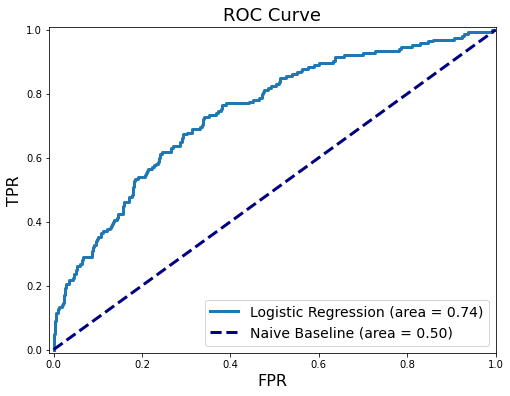

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()